In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Soilved as slv

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Function to calculate settlement due to primary consolidation discretized

def delta_pc(sigma_o, sigma_f, OCR, Cc, Cr, Ho, eo):
    if OCR>1:
        sigma_c= sigma_o*OCR #calculate the preconsolidation stress
        if sigma_f<sigma_c:
            dpc= Ho*(Cr*np.log10(sigma_f/sigma_o))/(1+eo)
        else:
            dpc= Ho*(Cr*np.log10(OCR)+ Cc*np.log10(sigma_f/sigma_c) )/(1+eo)
    else:
        dpc= Ho*(Cc*np.log10(sigma_f/sigma_o))/(1+eo)
    return dpc


def calc_layered_settlement(H_total, n_layers, gamma_sat, q, B, OCR, Cc, Cr, eo):
    # Calculate the thickness of each layer
    H_layer= H_total/n_layers
    #Loop trough layers
    total_settlement=0
    for i in range(n_layers):
        #calculate effective stress at mid layer
        z= H_layer*(i+0.5)
        sigma_o= (gamma_sat-62.4)*z #effective stress at mid layer in psf
        # calculate stress increase
        Delta_sigma= stress_increase(q, B, z)
        # Calculate final effective stress
        sigma_f= sigma_o+Delta_sigma
        #calculate settlement
        total_settlement+= delta_pc(sigma_o, sigma_f, OCR, Cc, Cr, H_layer, eo)
    return total_settlement

def stress_increase(q, B, z):
    alpha= np.arctan(0.5*B/z) #angle of the stress increase
    I=2*(alpha+np.sin(alpha)*np.cos(alpha))/np.pi #infleunce factor
    Delta_sigma= q*I #stress increase
    return Delta_sigma

In [8]:
dpc=calc_layered_settlement(25, 1, 125, 6000, 15, 1.5, 0.33, 0.05, 0.95)

print(dpc)

2.595099538856377


In [10]:
dpc=calc_layered_settlement(25, 10, 125, 6000, 15, 1.5, 0.33, 0.05, 0.95)

print(dpc)

3.15540931255373


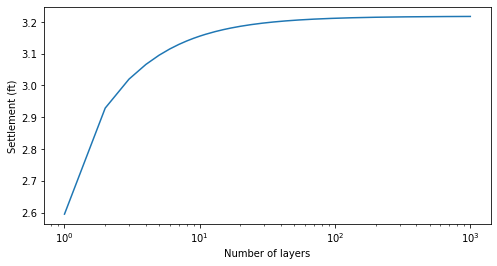

In [17]:
#calculate settlement for different number of layers
n_layers= np.arange(1, 1001)

settlement= np.zeros(len(n_layers))

for i in range(len(n_layers)):
    settlement[i]= calc_layered_settlement(25, n_layers[i], 125, 6000, 15, 1.5, 0.33, 0.05, 0.95)

# Plot the results
plt.plot(n_layers, settlement)
plt.xlabel('Number of layers')
plt.ylabel('Settlement (ft)')

#make x axis logarithmic
plt.xscale('log')

# Make plot be 8x4 inches
plt.gcf().set_size_inches(8, 4)

# save as svg
plt.savefig('settlement.svg')